# E-Commerce Customer Churn EDA and Machine Learning Classfications
---

E-commerce Customer Churn

## Context:

The data set belongs to a leading online E-commerce company. An online retail (E-commerce) company wants to know the customers who are going to churn, so accordingly, they can approach customers to offer some promos.

Features

| Column Name | Description |
| --- | --- |
|	Tenure                  | Tenure of a customer in the company.. |
|	WarehouseToHome         | Distance between the warehouse to the customer’s home|
|	NumberOfDeviceRegistered|    Total number of deceives is registered on a particular customer|
|	PreferedOrderCat        |    Preferred order category of a customer in the last month|
|	SatisfactionScore       |   Satisfactory score of a customer on service|
|	MaritalStatus           |   Marital status of a customer|
|	NumberOfAddress         |     Total number of added on a particular customer|
|	Complaint               |   Any complaint has been raised in the last month|
|	DaySinceLastOrder       |   Day since last order by customer|
|	CashbackAmount          |  Average cashback in last month|
|	Churn                   |   Churn flag|


For a hotel business, prediction of cancellation of bookings is important to manage the business. If the hotel can predict the cancellation of bookings, they can plan for the resources and manage the business better.

Essentially, if a guest cancel the booking, the hotel will lose the revenue. On the other hand, if the hotel overbooked the rooms, they will have to pay for the compensation to the guests. Therefore, it is important for the model to predict 


For this case, the Hotel are going to make the policy for booking cancellation. The policy is as follows:
If the model predicts that the booking will be cancelled, the hotel will offer the room to other guests.
If the model predicts that the booking will not be cancelled, the hotel will not offer the room to other guests.

In this case, assumed that the hotel could provide a reserved room for double booking case, or an upgrade to the rooms , or refund the ticket based on the booking date which is usually lower to present day's rate to minimize the loss of revenue; rather than losing potential revenue in the case of False Positive Prediction.

## Model Objective

| |  |
| --- | --- |
If Cancel == 1 (Yes), the booking is cancelled. | **Positive Class**
If Cancel == 0 (No), the booking is not cancelled. | **Negative Class**

The business will lose more revenue if the model predicts that the booking will not be cancelled, but it is actually cancelled. 

Therefore, the model should have a **lower False Negative** counts and **higher Recall Score** for the **positive class**,
we will use **Recall Score** and **F2 Score** as the evaluation metrics for the model.

## Outline

1. Data Preparation
2. Model Selection based on F2 Score
    - Logistic Regression
    - Decision Tree
    - KNN 
    - Voting Classifier (Logistic Regression, Decision Tree, KNN)
    - Stacked Model (Logistic Regression, Decision Tree, KNN)
    - Random Forest
    - XGBoost
3. Best Model Tuning and Evaluation
4. Conclusion

# 1. Initiate Library & Import Data

In [2]:
#Load data
## EDA Standard Libary

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats as ss

In [22]:
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Load data
df = pd.read_csv('/Users/Dwika/My Projects/CAPSTONE 3 PURWADHIKA/DATA/data_ecommerce_customer_churn.csv')

In [4]:
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


In [5]:
df['Churn'].value_counts()

Churn
0    3267
1     674
Name: count, dtype: int64

In [6]:
#Construct deep Info on columns & values:

datainfo = []
for i in df.columns:
    datainfo.append([i, df[i].dtypes,
                      df[i].isna().sum(),
                      round((((df[i].isna().sum())/(len(df)))*100),2), 
                    df[i].nunique(), 
                    df[i].sample(3).values])
pd.DataFrame(datainfo, columns = ['dataFeatures', 'dataType', 'null', 'nullPct', 'unique','uniqueSample'])


,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Tenure,float64,194,4.92,36,"[13.0, 22.0, 17.0]"
1,WarehouseToHome,float64,169,4.29,33,"[14.0, 25.0, 29.0]"
2,NumberOfDeviceRegistered,int64,0,0.00,6,"[3, 3, 4]"
3,PreferedOrderCat,object,0,0.00,6,"[Laptop & Accessory, Mobile, Mobile]"
4,SatisfactionScore,int64,0,0.00,5,"[1, 1, 1]"
5,MaritalStatus,object,0,0.00,3,"[Single, Married, Married]"
6,NumberOfAddress,int64,0,0.00,14,"[6, 9, 2]"
7,Complain,int64,0,0.00,2,"[0, 0, 0]"
8,DaySinceLastOrder,float64,213,5.40,22,"[0.0, nan, nan]"
9,CashbackAmount,float64,0,0.00,2335,"[148.05, 164.1, 234.99]"


## 2. Data Cleaning & Preprocessing

### 2.1 Duplicate Data Cleaning

In [7]:
#Check Duplicate data
df.duplicated().sum()   


671

In [8]:
#Drop duplicate
df = df.drop_duplicates()

### 2.2 Missing Data Cleaning

In [9]:
#Check missing value
df.isnull().sum()

Tenure                      160
WarehouseToHome             135
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           181
CashbackAmount                0
Churn                         0
dtype: int64

In [10]:
df[df['DaySinceLastOrder'].isna()]

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
10,6.0,26.0,6,Fashion,3,Married,5,0,NaN,221.10,0
13,1.0,7.0,5,Fashion,3,Divorced,7,0,NaN,231.09,1
29,1.0,17.0,5,Fashion,5,Married,11,0,NaN,228.06,1
52,16.0,9.0,4,Fashion,1,Married,4,1,NaN,226.24,0
...,...,...,...,...,...,...,...,...,...,...,...
3771,22.0,13.0,4,Fashion,3,Single,9,0,NaN,209.65,0
3836,28.0,8.0,4,Fashion,3,Married,9,0,NaN,230.02,0
3843,13.0,7.0,2,Fashion,1,Married,2,0,NaN,221.13,0
3894,9.0,24.0,4,Laptop & Accessory,5,Divorced,5,1,NaN,214.66,0


In [11]:
df['DaySinceLastOrder'].value_counts()

DaySinceLastOrder
3.0     516
2.0     461
1.0     356
8.0     326
0.0     286
4.0     260
7.0     253
9.0     173
5.0     131
10.0     91
6.0      68
11.0     45
12.0     36
13.0     29
14.0     18
15.0     12
17.0     11
16.0      8
18.0      6
30.0      1
46.0      1
31.0      1
Name: count, dtype: int64

In [12]:
df[df['WarehouseToHome'].isna()]

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
27,0.0,NaN,1,Mobile,3,Single,4,1,3.0,124.32,1
33,0.0,NaN,4,Mobile,4,Divorced,6,0,1.0,125.46,1
34,0.0,NaN,4,Mobile,1,Married,6,0,3.0,123.67,1
35,0.0,NaN,3,Mobile,5,Married,4,0,0.0,123.22,0
57,0.0,NaN,4,Mobile,4,Married,2,0,3.0,123.68,0
...,...,...,...,...,...,...,...,...,...,...,...
3799,0.0,NaN,3,Mobile,1,Married,2,1,0.0,125.15,1
3851,3.0,NaN,3,Mobile,4,Divorced,2,0,0.0,124.76,0
3871,7.0,NaN,1,Mobile,3,Married,1,0,0.0,125.85,0
3898,0.0,NaN,3,Mobile,3,Married,2,0,2.0,126.10,1


In [13]:
df['WarehouseToHome'].value_counts()

WarehouseToHome
9.0      310
8.0      266
7.0      256
6.0      187
14.0     181
15.0     167
16.0     162
10.0     159
13.0     142
11.0     139
12.0     128
17.0     110
31.0      62
22.0      59
30.0      57
25.0      56
35.0      55
21.0      54
18.0      53
32.0      52
26.0      51
23.0      51
27.0      46
24.0      46
19.0      45
28.0      43
29.0      43
33.0      42
20.0      41
34.0      35
36.0      30
5.0        6
127.0      1
Name: count, dtype: int64

In [14]:
df[df['Tenure'].isna()]

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
16,NaN,21.0,5,Mobile,1,Married,1,1,3.0,121.68,0
37,NaN,6.0,4,Mobile,5,Married,2,0,2.0,122.18,0
44,NaN,7.0,4,Mobile,3,Married,2,0,0.0,120.08,0
85,NaN,6.0,3,Mobile,1,Married,4,0,2.0,122.70,0
93,NaN,15.0,3,Mobile,1,Married,4,0,3.0,120.75,0
...,...,...,...,...,...,...,...,...,...,...,...
3792,NaN,24.0,3,Mobile,1,Single,2,0,7.0,121.53,0
3814,NaN,8.0,3,Mobile,5,Divorced,7,1,2.0,120.42,1
3842,NaN,26.0,3,Mobile,3,Married,5,0,0.0,122.59,0
3853,NaN,28.0,3,Mobile Phone,3,Single,2,1,0.0,116.75,1


In [15]:
df['Tenure'].value_counts()

Tenure
1.0     400
0.0     282
8.0     151
9.0     139
4.0     130
10.0    128
5.0     123
7.0     123
3.0     118
6.0     116
11.0    113
2.0     103
14.0     99
13.0     98
12.0     97
19.0     90
16.0     85
15.0     83
18.0     65
17.0     65
20.0     64
23.0     52
24.0     46
22.0     42
21.0     42
27.0     41
30.0     40
28.0     39
26.0     37
25.0     35
29.0     30
31.0     30
61.0      1
51.0      1
60.0      1
50.0      1
Name: count, dtype: int64

<Axes: xlabel='Tenure', ylabel='Density'>

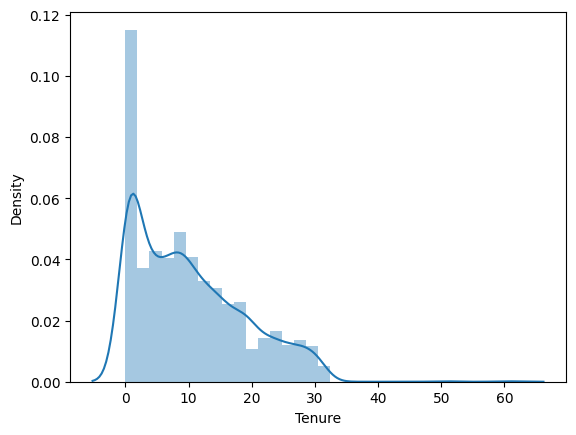

In [23]:
sns.distplot(df['Tenure'])

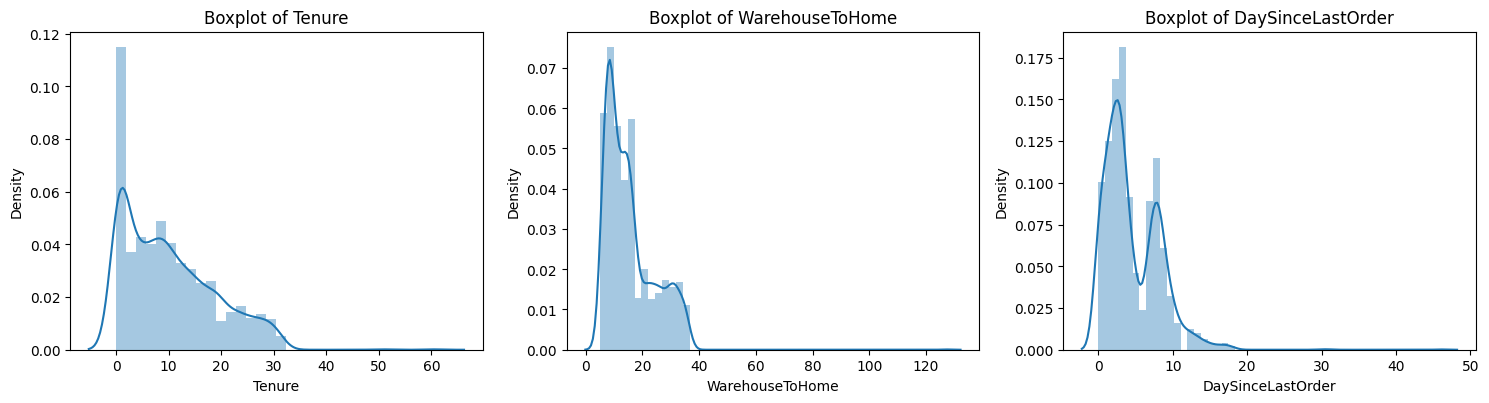

In [29]:
numerical_cols = ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder']

#Plotting boxplot for numerical values 
plt.figure(figsize=(15, 15))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.distplot(df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    
plt.tight_layout()
plt.show()

## 3. Feature Engineering

### 3.1 Data Profiling